# **PERSIAPAN DATA**

In [245]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('ObesityDataSet.csv')

# **EDA (Exploratory Data Analysis)**

In [246]:
# mencoba menampilkan info dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [248]:
# Melihat Deskripsi statistik
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [249]:
# Cek missing values, duplikasi, dan unique values
print('Missing Values:')
display(df.isnull().sum())

Missing Values:


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [250]:
print('Data duplikat:',df.duplicated().sum())

Data duplikat: 18


In [251]:
print('Jumlah data uniq per kolom:')
display(df.nunique())

Jumlah data uniq per kolom:


,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


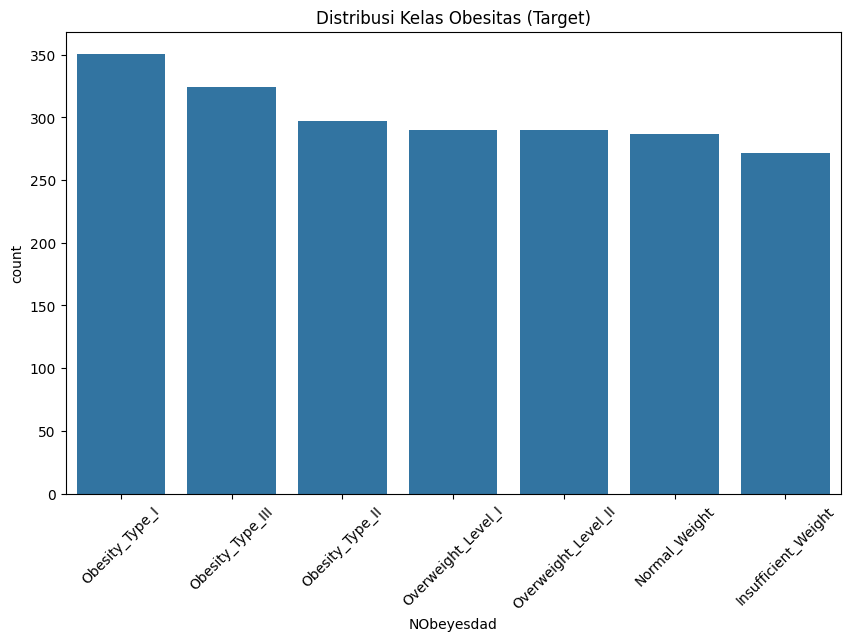

In [252]:
# Distribusi kelas target
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Obesitas (Target)')
plt.show()

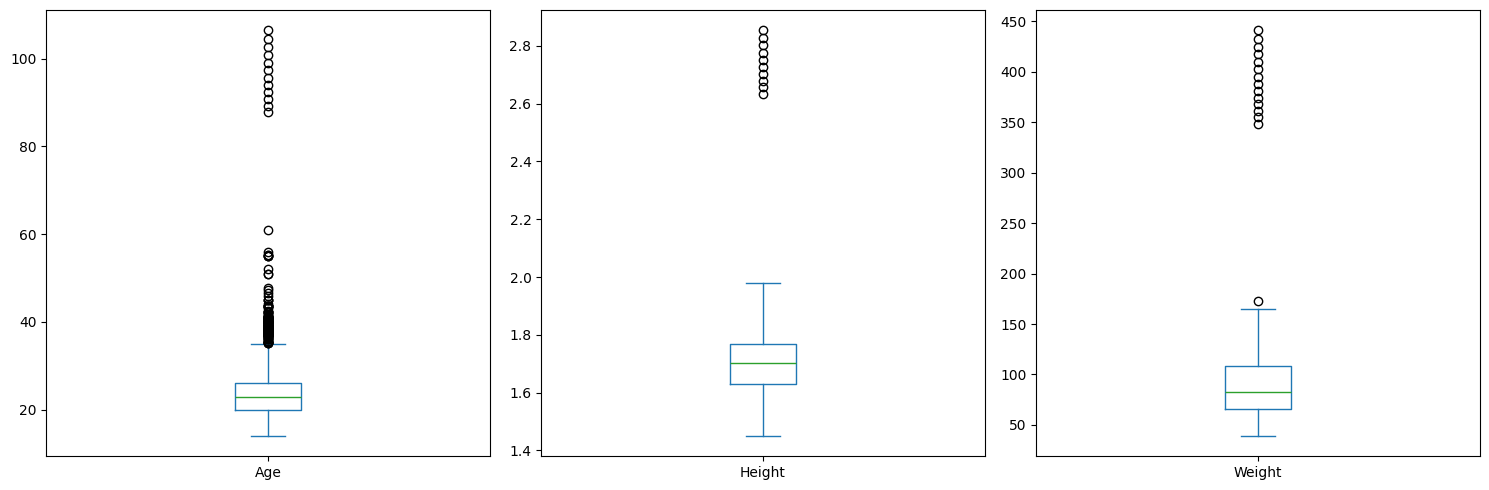

In [253]:
# Boxplot untuk deteksi outlier kolom numerik
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

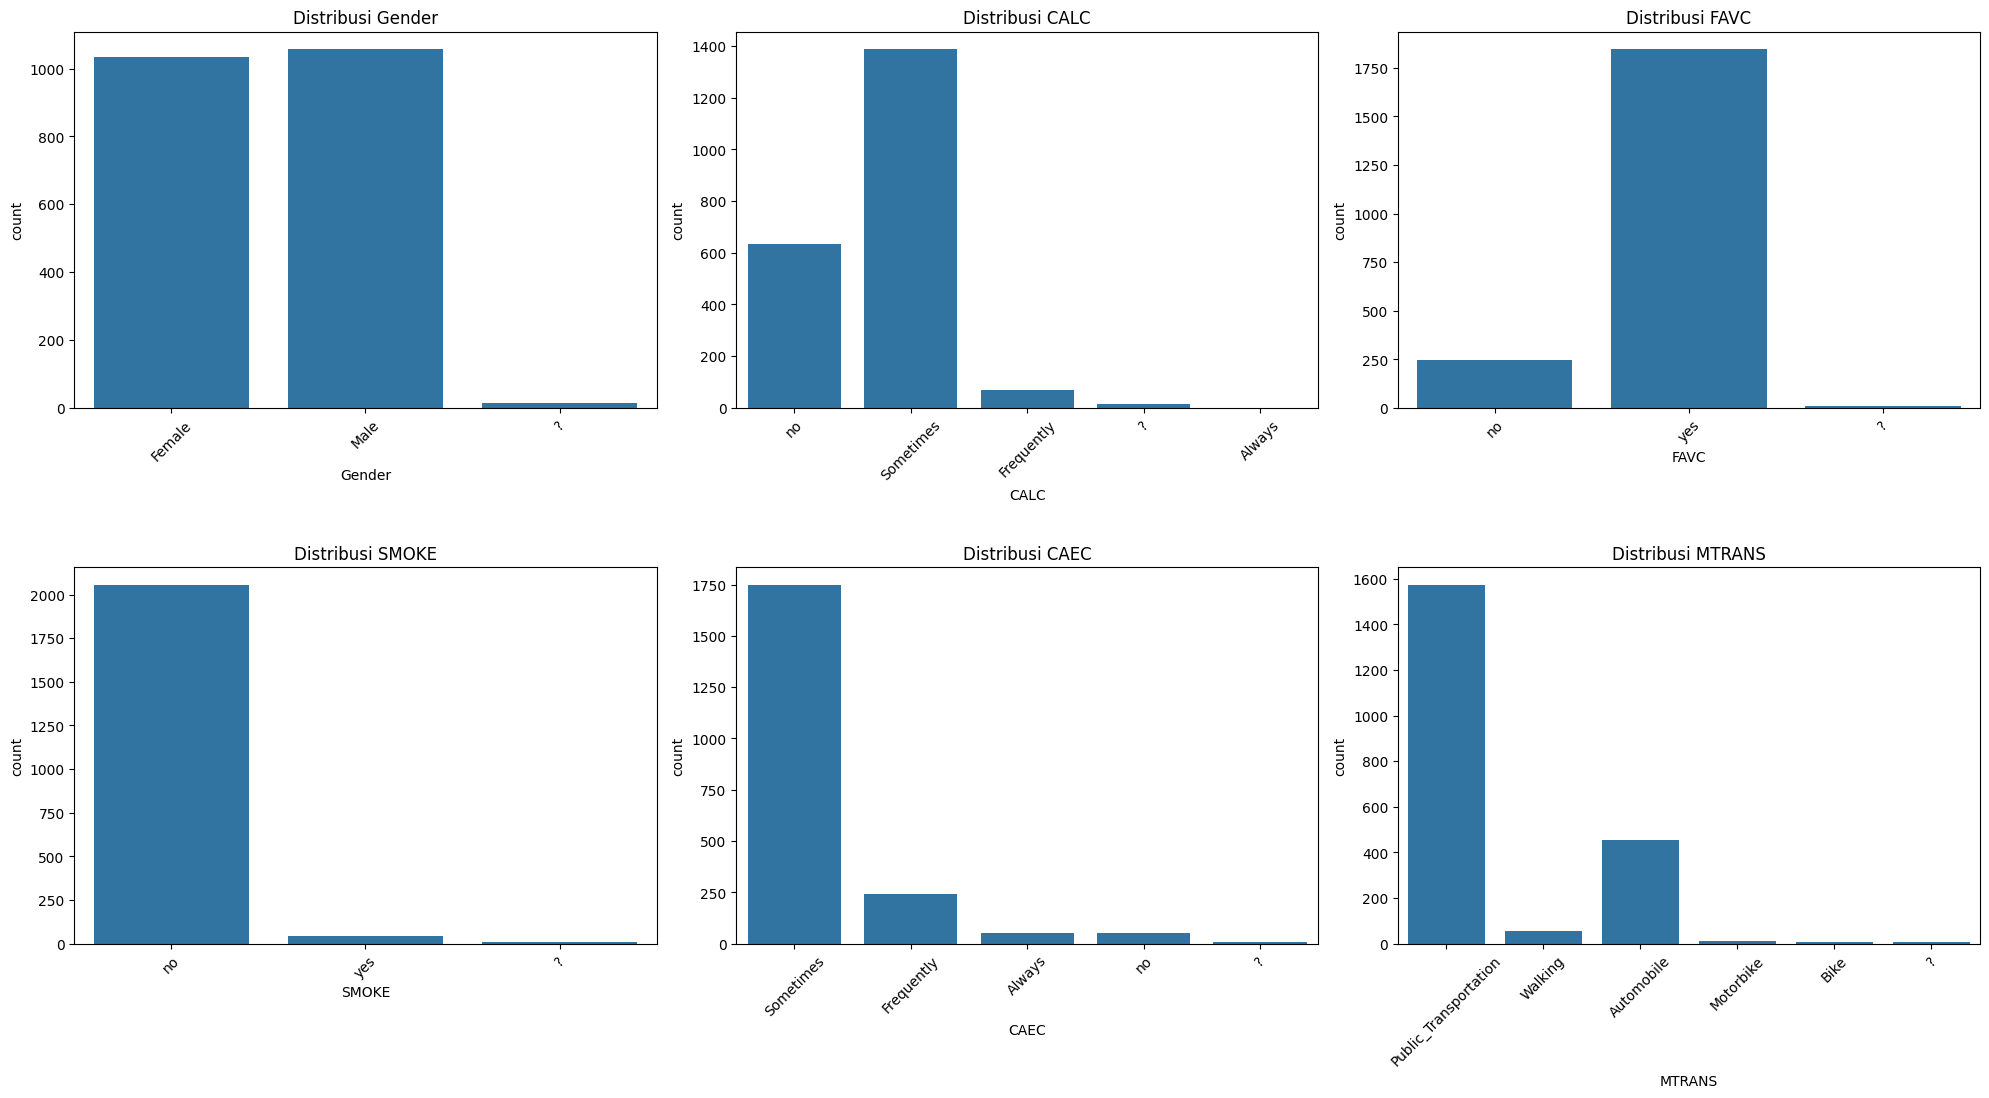

In [254]:
#visualisasi nilai/data kategorikal

cat_cols = ['Gender', 'CALC', 'FAVC', 'SMOKE', 'CAEC', 'MTRANS']

plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

###  Kesimpulan EDA
- Dataset terdiri dari 17 kolom dan 2111 baris.
- Banyak kolom bertipe `object`, termasuk data numerik.
- Ada missing values dan data duplikat yang perlu ditangani.
- Distribusi kelas target tampak tidak seimbang.
- Beberapa kolom numerik menunjukkan kemungkinan adanya outlier.
- Visualisasi kolom kategorikal menunjukkan:

   - Beberapa kolom seperti `Gender, CALC, SMOKE, dan MTRANS` memiliki nilai tidak valid seperti '?', yang harus dibersihkan atau dikategorikan ulang.

   - Distribusi kategori pada beberapa kolom tidak merata, yang dapat berpengaruh terhadap model jika tidak diatasi dengan baik (misalnya dengan encoding atau balancing).

# **PRE-PROCESSING**

In [255]:
# Import library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Ganti tanda '?' menjadi NaN agar bisa dideteksi sebagai missing value
df.replace('?', np.nan, inplace=True)

# Ubah kolom-kolom yang seharusnya numerik ke tipe float
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek tipe kolom dan tentukan kolom kategorikal dan numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Untuk data kategorikal, isi missing value dengan modus (nilai terbanyak)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Untuk data numerik, isi missing value dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

# Hapus data duplikat
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

df.head(51)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.62,64.000000,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.52,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.80,77.000000,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.80,87.000000,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.00000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.78,89.800000,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
5,29.000000,Male,1.62,53.000000,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.00000,Sometimes,Automobile,Normal_Weight
6,23.000000,Female,1.50,55.000000,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.00000,Sometimes,Motorbike,Normal_Weight
7,22.000000,Male,1.64,53.000000,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
8,24.000000,Male,1.78,348.497776,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
9,22.000000,Male,1.72,68.000000,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight


In [256]:
print(f"Jumlah data sebelum hapus duplikat: {before}")
print(f"Jumlah data setelah hapus duplikat: {after}")
print(f"Jumlah data duplikat yang dihapus: {before - after}")

Jumlah data sebelum hapus duplikat: 2111
Jumlah data setelah hapus duplikat: 2091
Jumlah data duplikat yang dihapus: 20


- Menghindari Kehilangan Informasi
- Menjaga Keseimbangan Distribusi Data

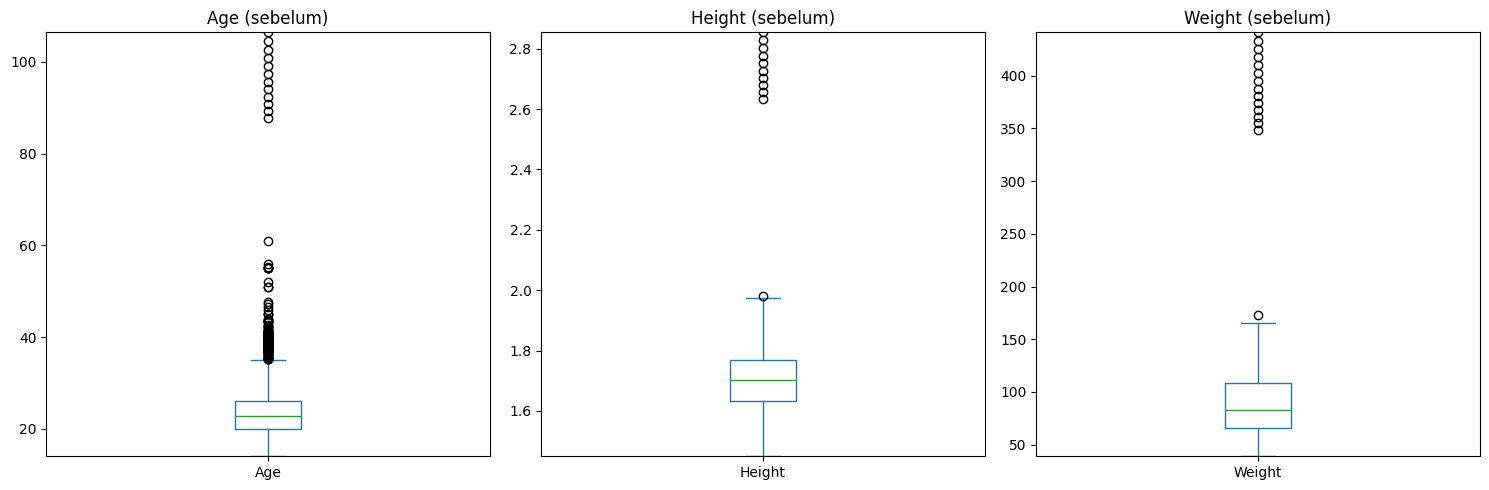

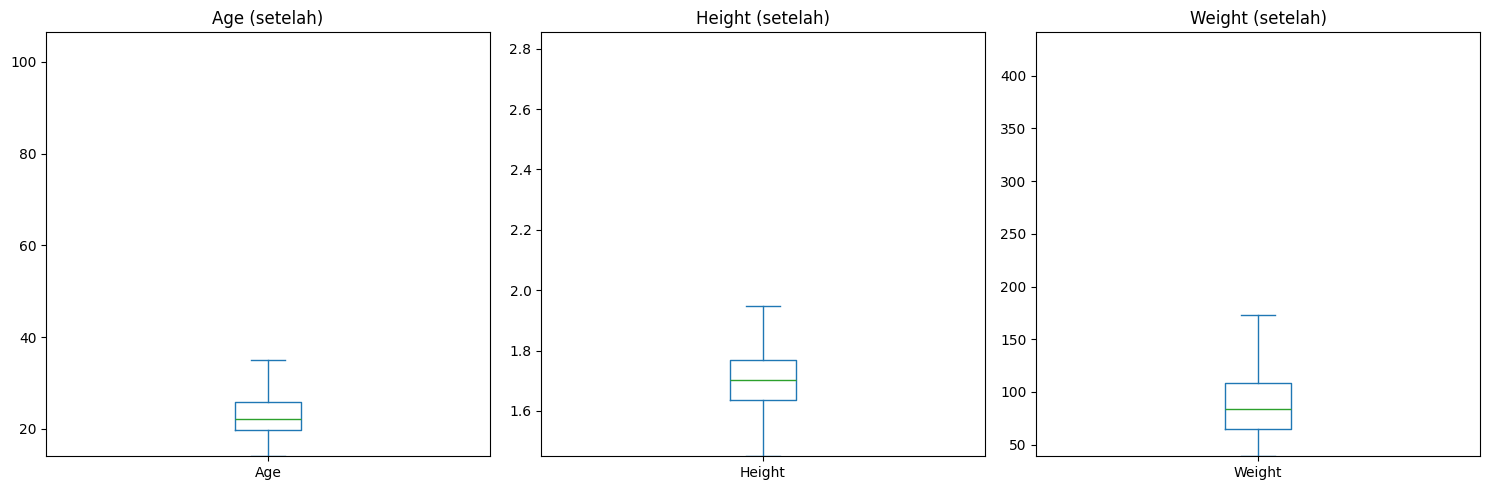

In [257]:
# Pastikan data numerik benar
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Tentukan batas sumbu y agar konsisten
y_limits = {}
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    y_limits[col] = (min_val, max_val)

# visualisasi data numerik sebelum menangani outlier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (sebelum)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

# Metode IQR untuk menghapus outlier dari kolom numerik
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Visualisasi boxplot setelah outlier ditangani
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (setelah)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

- Mengapa perlu tangani outlier?
  - Agar data lebih bersih, model tidak terganggu, dan visualisasi lebih representatif
- Mengapa hanya 3 kolom (Age, Height, Weight)?
  - Karena hanya 3 kolom tersebut yang benar-benar numerik kontinu dan rawan outlier; kolom lain tidak cocok untuk deteksi outlier menggunakan IQR

In [258]:
# Encoding fitur kategorikal (selain target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')

# Label encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding untuk target
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])
label_encoders['NObeyesdad'] = target_encoder

# Tampilkan hasil encode awal
print("Data setelah encoding:")
display(df.head())


#kenapa harus di encode? karena agar bisa diproses oleh algoritma machine learning, yang umumnya hanya bisa bekerja dengan data numerik.

Data setelah encoding:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


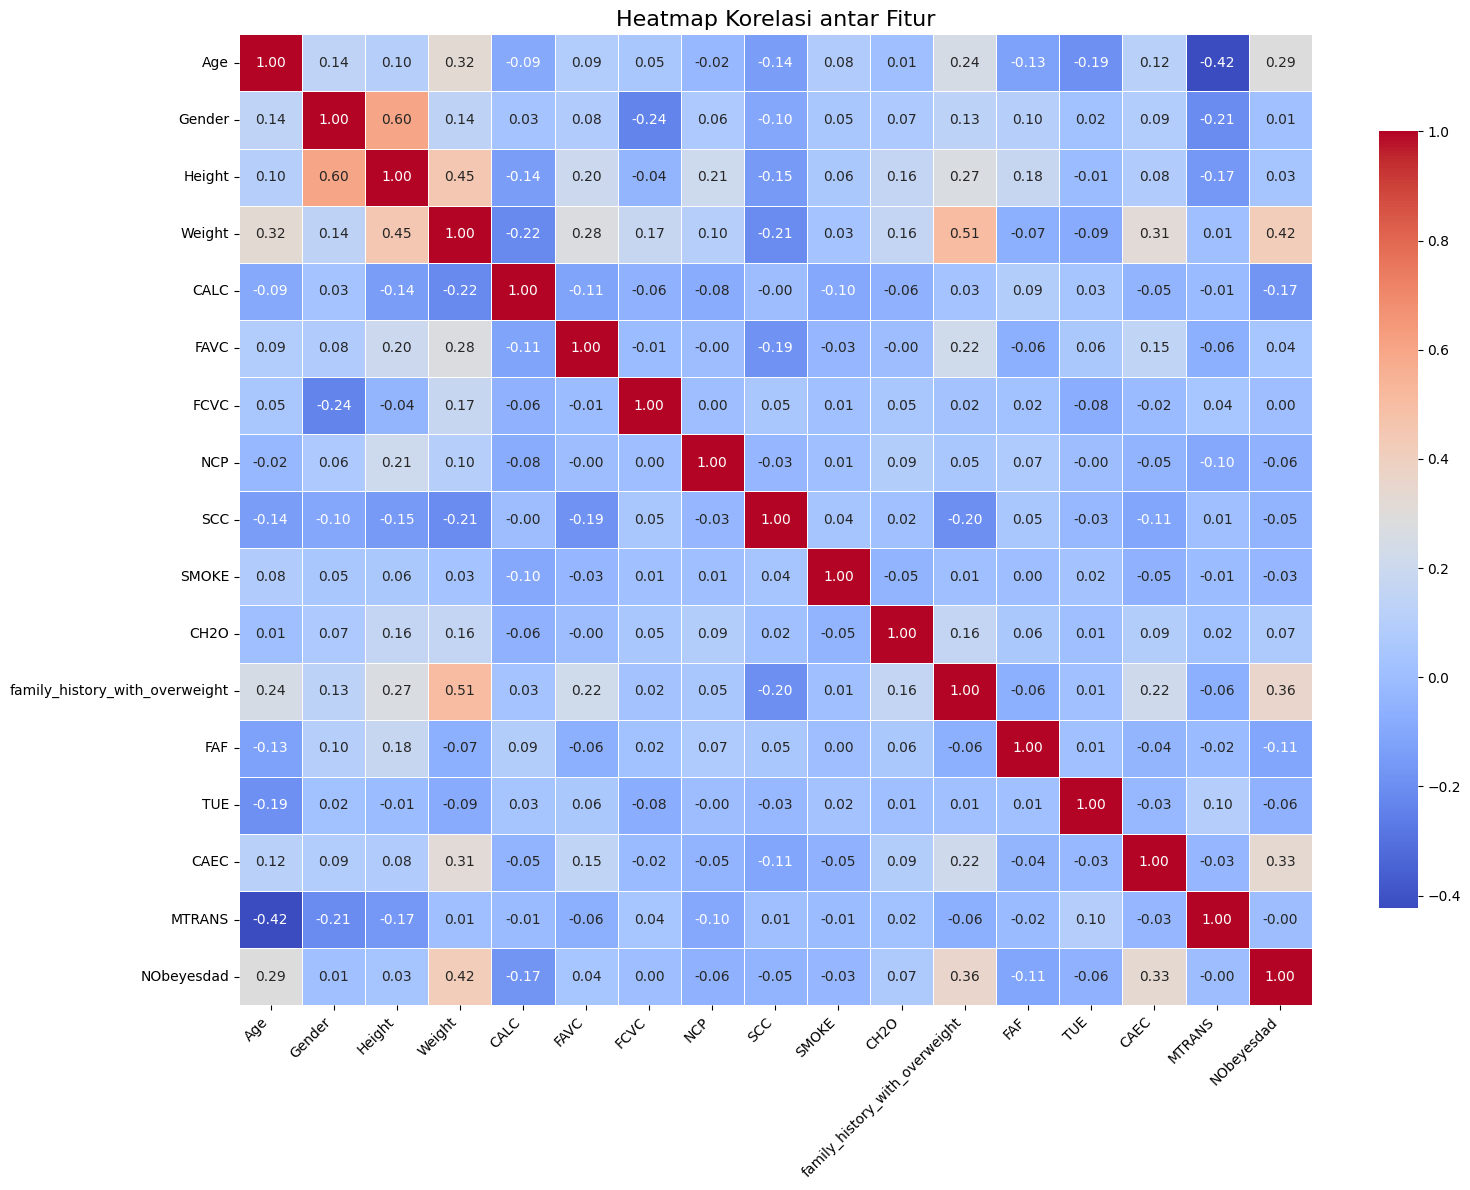

In [259]:
# Heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Warna dan Nilai:

- Warna merah menunjukkan korelasi positif kuat (mendekati +1).

- Warna biru menunjukkan korelasi negatif kuat (mendekati -1).

- Nilai mendekati 0 berarti tidak ada hubungan linear yang signifikan antara dua fitur.

# Korelasi terhadap Target (NObeyesdad):

- Weight memiliki korelasi positif tertinggi (0.42) terhadap target, artinya semakin tinggi berat badan, kemungkinan kelas obesitas meningkat.

- family_history_with_overweight (0.36) juga memiliki korelasi positif cukup kuat, menunjukkan riwayat keluarga berpengaruh terhadap obesitas.

- CAEC (0.33), Age (0.29) dan dan CH2O (0.10) juga punya pengaruh, meskipun lebih lemah.

- MTRANS (-0.00) memiliki korelasi negatif atau sangat lemah terhadap target, artinya hubungannya tidak signifikan.

# Korelasi antar fitur lain:

- Height dan Weight: korelasi cukup tinggi (0.45), karena tinggi badan dan berat badan sering sejalan.

- Weight dan family_history_with_overweight: korelasi cukup tinggi (0.51).

- Fitur-fitur seperti SCC, SMOKE, dan NCP memiliki korelasi rendah terhadap fitur lainnya dan terhadap target.

In [260]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

memisahkan data menjadi fitur dan target, lalu menstandarisasi fitur agar semua memiliki skala yang seragam. Penting supaya model machine learning dapat belajar secara efektif tanpa bias akibat perbedaan skala fitur.

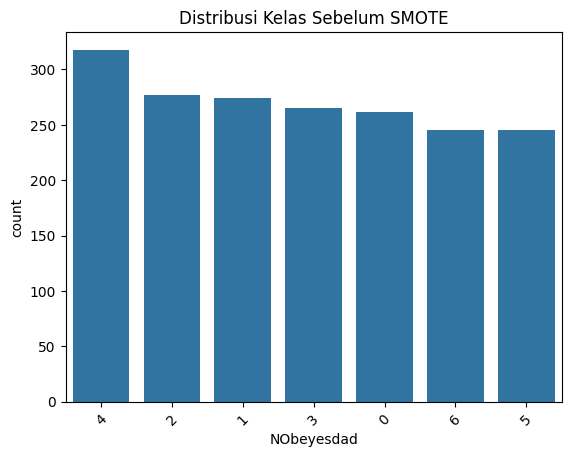

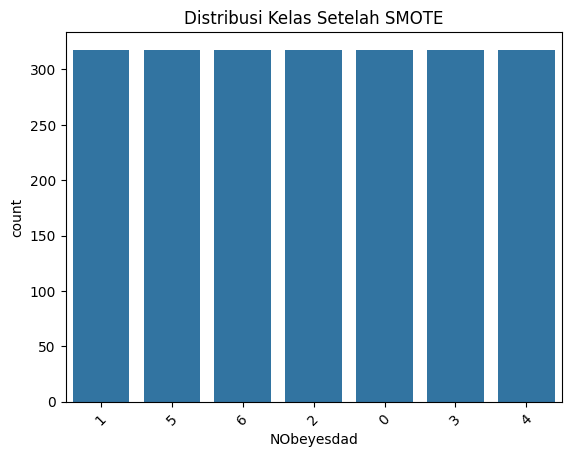

In [261]:
# Visualisasi distribusi kelas sebelum SMOTE
sns.countplot(x=y, order=pd.Series(y).value_counts().index)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

# SMOTE digunakan agar model machine learning tidak terlalu condong ke kelas mayoritas dan tetap mampu mengenali pola di kelas minoritas dengan baik.
# Berguna juga untuk peningkatan akurasi, recall, F1-score terutama untuk kelas minoritas yang biasanya sulit dikenali.

In [262]:
# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

# dataset dibagi menjadi 80% data latih dan 20% data uji dengan 16 kolom fitur yang ada di dalam dataset

Ukuran data latih: (1780, 16)
Ukuran data uji: (446, 16)


### Kesimpulan Preprocessing Data
- Missing values berhasil diatasi dengan mengganti nilai "?" pada kolom kategorikal dengan modus dan numerik dengan median. Meskipun sedikit tapi masih sangat berguna jika ada informasi peting dikarenakan dataset yang ada masih relatif sedikit.

- untuk data duplikat berhasil dihapus dan menyisah=kan kolom pertama (yang asli).

- Semua fitur kategorikal telah dikonversi ke bentuk numerik menggunakan Label Encoding.

- Seluruh fitur digunakan karena tidak ada korelasi yang sangat rendah terhadap target.

- Data numerik telah dinormalisasi menggunakan StandardScaler agar berada dalam skala yang seragam.

- Distribusi kelas target yang sebelumnya tidak seimbang telah ditangani menggunakan teknik SMOTE.

- Dataset telah dibagi menjadi data latih dan data uji untuk keperluan pemodelan.

# **PELATIHAN MODEL & EVALUASI**

In [263]:
# import lib Model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import lib Metrik evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [264]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Loop untuk pelatihan dan prediksi masing-masing model
for model_name, model in models.items():
    print(f"Model Algoritma: {model_name}")
    model.fit(X_train, y_train)  # latih model
    y_pred = model.predict(X_test)  # prediksi

    # Evaluasi metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil
    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred
    }

    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))
    print("="*60)

Model Algoritma: Logistic Regression
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.97      0.90        70
      Normal_Weight       0.85      0.64      0.73        70
     Obesity_Type_I       0.92      0.84      0.88        64
    Obesity_Type_II       0.90      0.95      0.92        58
   Obesity_Type_III       0.98      0.98      0.98        60
 Overweight_Level_I       0.81      0.84      0.82        64
Overweight_Level_II       0.75      0.82      0.78        60

           accuracy                           0.86       446
          macro avg       0.86      0.86      0.86       446
       weighted avg       0.86      0.86      0.86       446

Model Algoritma: Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.96        70
      Normal_Weight       0.87      0.94      0.90        70
     Obesity_Type_I       1.00      0.98      0.99        64
    Obesity_T

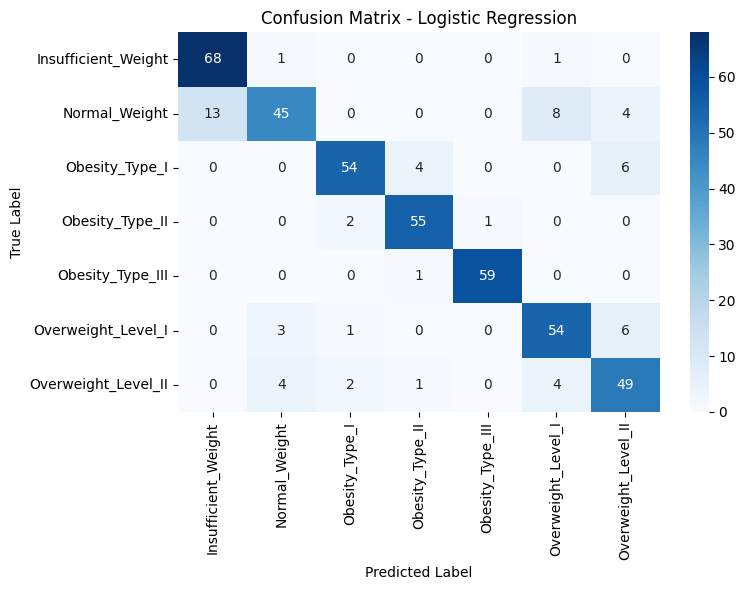

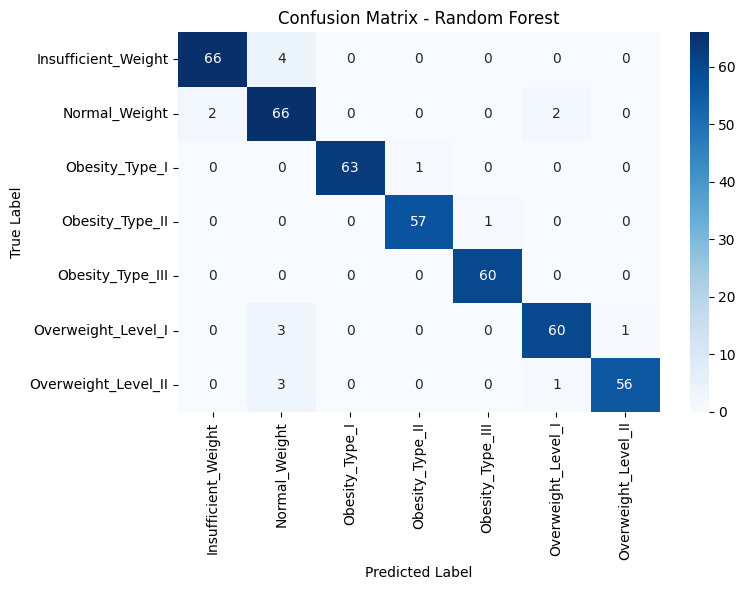

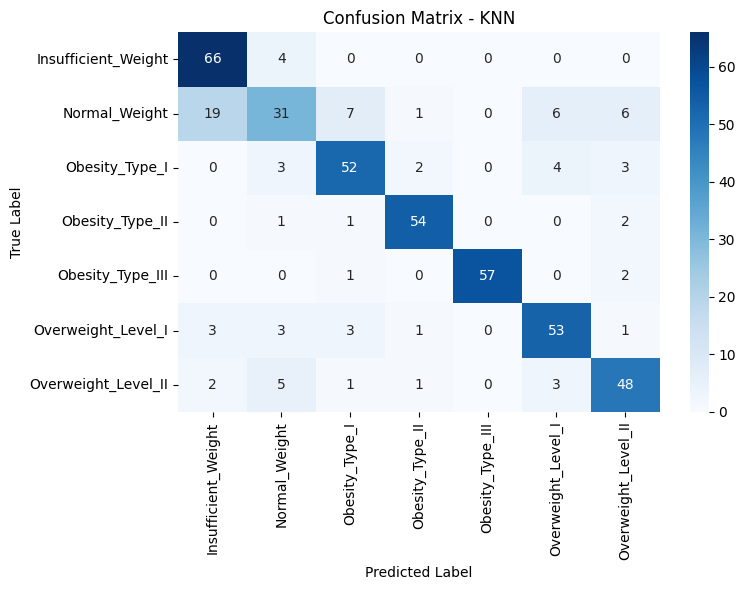

In [265]:
# Plot confusion matrix dari setiap model
for model_name in models:
    cm = confusion_matrix(y_test, results[model_name]["y_pred"])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

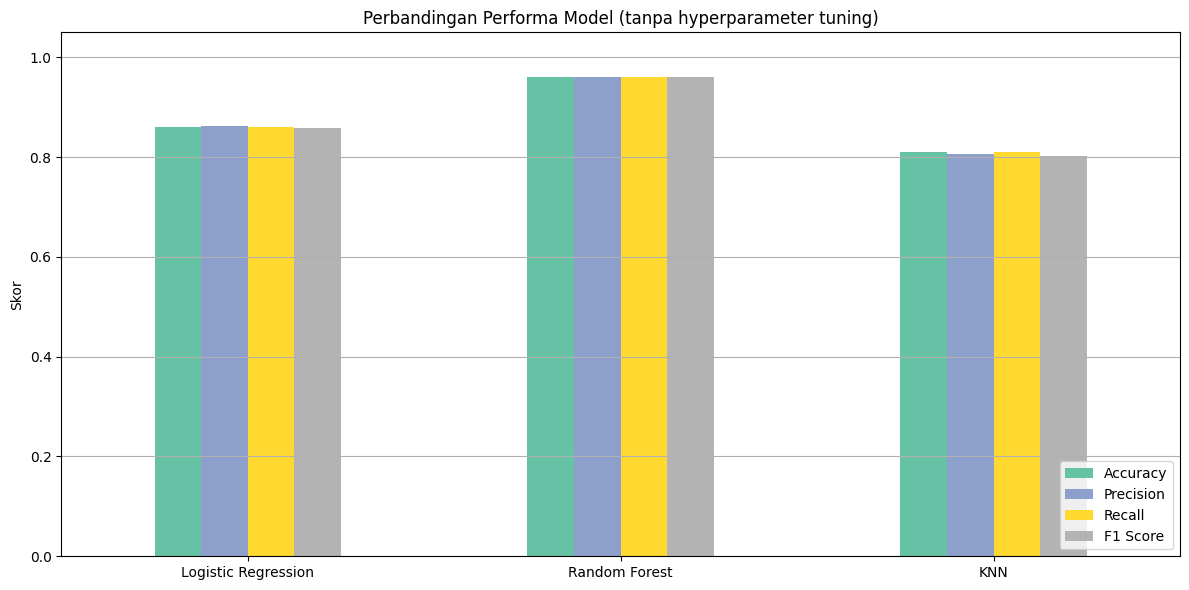

Tabel Hasil Evaluasi Model:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.860987,0.862968,0.860987,0.85847
Random Forest,0.959641,0.961091,0.959641,0.959984
KNN,0.809417,0.806354,0.809417,0.802329


In [266]:
# Konversi dictionary hasil ke DataFrame
results_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Visualisasi perbandingan
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Perbandingan Performa Model (tanpa hyperparameter tuning)")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tampilkan tabel evaluasi
print("Tabel Hasil Evaluasi Model:")
display(results_df)

### Kesimpulan Pelatihan dan Evaluasi 3 Model Algoritma Klasifikasi
- didapatkan setelah melakukan pre-processing dengan benar saat pelatihan model dengan menggunakan algoritma logistic regression, random forest, dan knn. ketiga model memberikan hasil evaluasi cukup bagus dan menandakan model telah berhasil dilatih dengan minim kesalahan untuk dataset obesitas.

- diperoleh hasil tertinggi yaitu random forest dengan hasil rata-rata 96%, yang dimana menandakan bahwa algoritma ini berhasil mengklasifikasikan hampir semuanya benar untuk kelas targetnya.

# **HYPERPARAMETER TUNING dengan GridSearchCV**

In [267]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk setiap model
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],            # Parameter regulasi (semakin kecil, semakin kuat regulasinya)
        'penalty': ['l2'],                       # Jenis penalti regulasi (L2 = Ridge)
        'solver': ['lbfgs']                      # Algoritma optimasi yang cocok untuk L2
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],          # Jumlah pohon dalam ensemble
        'max_depth': [None, 10, 20],             # Kedalaman maksimum setiap pohon (None = tidak dibatasi)
        'min_samples_split': [2, 5],             # Minimum jumlah sampel untuk memisahkan node
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],            # Jumlah tetangga terdekat yang digunakan untuk klasifikasi
        'weights': ['uniform', 'distance'],     # Bobot tetangga (uniform = semua sama, distance = lebih dekat lebih berpengaruh)
        'metric': ['euclidean', 'manhattan']    # Metode pengukuran jarak antar data
    }
}

In [268]:
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Menyimpan model hasil tuning dan evaluasinya
best_models = {}     # Menyimpan model terbaik dari hasil tuning
tuned_results = {}   # Menyimpan hasil evaluasi tiap model setelah tuning

# Loop untuk tuning dan evaluasi masing-masing model
for name in base_models:
    print(f"Tuning model: {name}")

    # Lakukan pencarian kombinasi hyperparameter terbaik menggunakan GridSearchCV
    grid = GridSearchCV(
        base_models[name],         # model dasar yang akan dituning
        param_grid[name],          # grid parameter yang akan diuji
        cv=5,                      # 5-fold cross validation
        scoring='f1_weighted',     # skor evaluasi berdasarkan F1-score tertimbang
        n_jobs=-1                  # gunakan semua core CPU untuk paralelisasi
    )
    grid.fit(X_train, y_train)     # latih GridSearch dengan data latih

    best_model = grid.best_estimator_   # simpan model dengan kombinasi parameter terbaik
    best_models[name] = best_model      # simpan ke dictionary

    # Evaluasi ulang model terbaik
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    tuned_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred
    }

    print(f"Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))
    print("="*60)

Tuning model: Logistic Regression
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.97      0.94        70
      Normal_Weight       0.92      0.83      0.87        70
     Obesity_Type_I       0.95      0.94      0.94        64
    Obesity_Type_II       0.92      0.97      0.94        58
   Obesity_Type_III       0.97      0.95      0.96        60
 Overweight_Level_I       0.89      0.92      0.91        64
Overweight_Level_II       0.93      0.93      0.93        60

           accuracy                           0.93       446
          macro avg       0.93      0.93      0.93       446
       weighted avg       0.93      0.93      0.93       446

Tuning model: Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.96      0.97        70
   

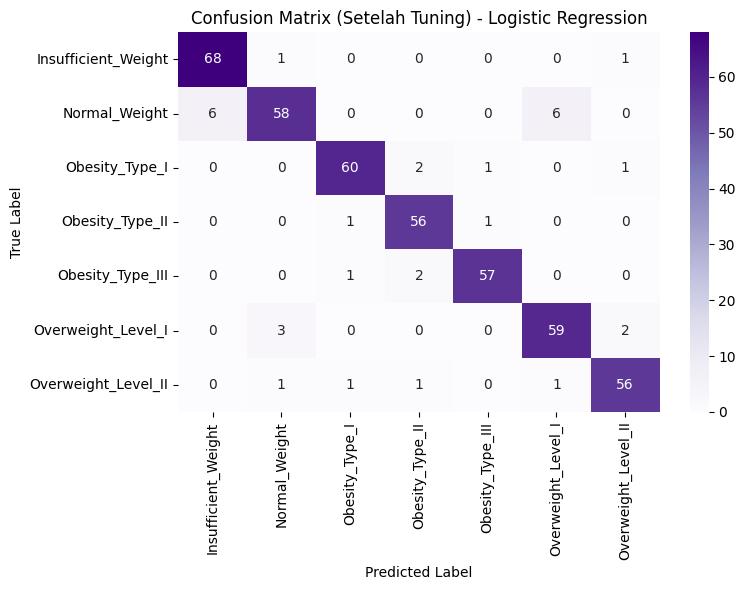

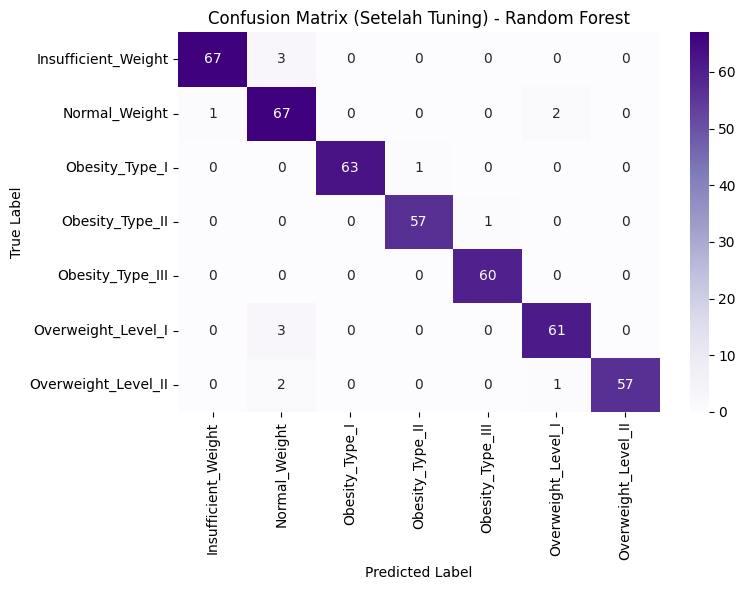

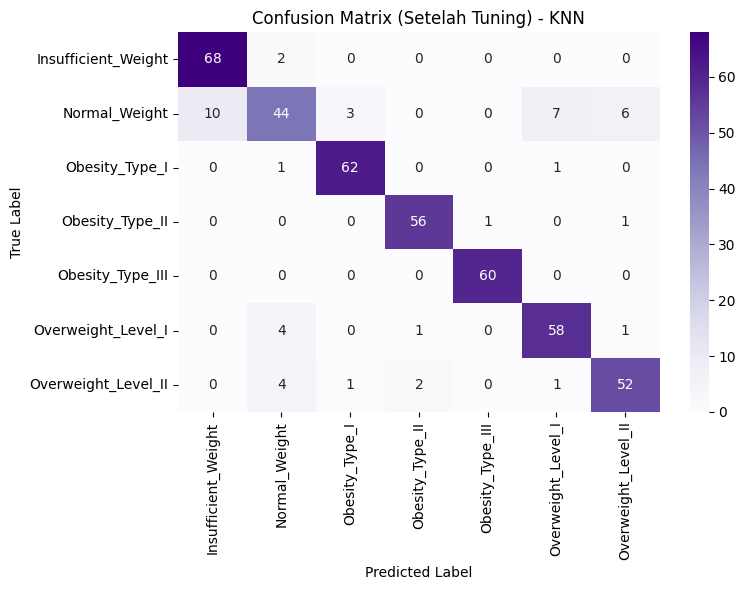

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix dari model hasil tuning
for model_name, model in best_models.items():
    y_pred = tuned_results[model_name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix (Setelah Tuning) - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

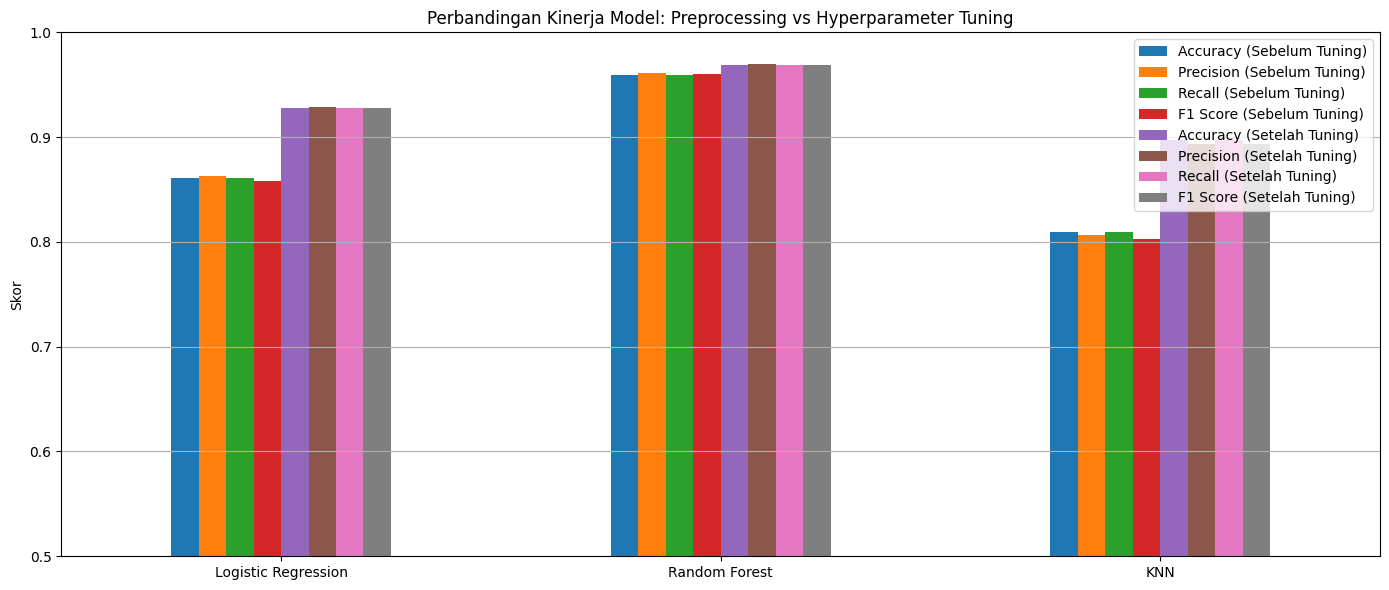

In [270]:
# Buat DataFrame dari hasil sebelum dan sesudah tuning
before_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
after_df = pd.DataFrame(tuned_results).T.drop(columns='y_pred')

# Gabungkan hasil
compare_df = pd.concat([
    before_df.add_suffix(" (Sebelum Tuning)"),
    after_df.add_suffix(" (Setelah Tuning)")
], axis=1)

# Visualisasi perbandingan
compare_df.plot(kind='bar', figsize=(14, 6))
plt.title("Perbandingan Kinerja Model: Preprocessing vs Hyperparameter Tuning")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Kesimpulan Hasil Evaluasi Model Sebelum dan Sesudah Melakukan Hyperparameter Tuning**

Logistic Regression:

- Sebelum tuning: Akurasi 86%, beberapa kelas seperti Normal Weight dan Overweight Level II memiliki f1-score rendah.

- Setelah tuning (C=100, penalty='l2', solver='lbfgs'): Akurasi meningkat menjadi 93%, performa antar kelas lebih seimbang.

- Kesimpulan: Tuning memberikan peningkatan signifikan.

Random Forest:

- Sebelum dan sesudah tuning: Akurasi tetap tinggi di 96%.

- Setelah tuning (n_estimators=100, max_depth=20, min_samples_split=2), performa tiap kelas sedikit lebih stabil.

- Kesimpulan: Model ini sudah sangat baik sejak awal.

KNN (K-Nearest Neighbors):

- Sebelum tuning: Akurasi hanya 81%, performa tidak merata (misalnya Normal Weight f1-score hanya 0.53).

- Setelah tuning (n_neighbors=3, weights='distance', metric='manhattan'): Akurasi naik jadi 90%, performa kelas membaik secara keseluruhan.

- Kesimpulan: Tuning sangat berpengaruh pada KNN.

Kesimpulan Umum:

- Tuning hyperparameter meningkatkan kinerja model, terutama pada Logistic Regression dan KNN.

- Random Forest tetap menjadi model terbaik dengan akurasi tertinggi dan hasil paling stabil.

- KNN yang awalnya lemah, jadi kompetitif setelah tuning.